In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Import a subset of million song dataset from https://archive.ics.uci.edu/ml/datasets/YearPredictionMSD
Description: Prediction of the release year of a song from audio features. Songs are mostly western, commercial tracks ranging from 1922 to 2011, with a peak in the year 2000s.

Data Set Information:

You should respect the following train / test split: 
train: first 463,715 examples 
test: last 51,630 examples 
It avoids the 'producer effect' by making sure no song 
from a given artist ends up in both the train and test set.


Attribute Information:

90 attributes, 12 = timbre average, 78 = timbre covariance 
The first value is the year (target), ranging from 1922 to 2011. 
Features extracted from the 'timbre' features from The Echo Nest API. 
We take the average and covariance over all 'segments', each segment 
being described by a 12-dimensional timbre vector.

In [24]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip', compression = 'zip')

In [29]:
#Check the dataframe header and column information. 
df.shape

(515344, 91)

In [30]:
#Goal is to predict the year of the song from it's attributes.
from sklearn.linear_model import LinearRegression

In [31]:
from sklearn.model_selection import train_test_split

In [33]:
df.describe()

,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
count,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,...,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000
mean,1998.397077,43.387113,1.289515,8.658222,1.164110,-6.553580,-9.521968,-2.391046,-1.793215,3.727868,...,15.755411,-73.461537,41.542388,37.934163,0.315750,17.669292,-26.315520,4.458653,20.035229,1.329104
std,10.931056,6.067557,51.580393,35.268505,16.322802,22.860803,12.857763,14.571853,7.963822,10.582869,...,32.099666,175.619058,122.228915,95.050718,16.161780,114.428002,173.977455,13.346567,185.558415,22.088598
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954667,-26.059848,-11.462775,-8.487507,-20.666455,-18.441005,-10.780360,-6.468390,-2.293670,...,-1.812658,-139.555737,-20.987115,-4.669655,-6.781597,-31.580617,-101.530305,-2.566137,-59.509452,-8.820248
50%,2002.000000,44.258490,8.417725,10.476235,-0.652855,-6.007770,-11.188355,-2.046625,-1.736415,3.822305,...,9.171850,-53.089115,28.790580,33.623815,0.820830,15.598520,-21.204225,3.117645,7.759910,0.053015
75%,2006.000000,47.833875,36.124030,29.764685,8.787548,7.741878,-2.388945,6.508587,2.913455,9.961865,...,26.274487,13.478792,89.661785,77.785810,8.471000,67.795110,52.389322,9.967742,86.351645,9.679540
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


In [34]:
df.head()

,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
4,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263


Looking at the labels it seems that a better picture could be obtained by checking the correlation between each data features and it'd be logical to feature engineer the label. i.e Check the range of years in the dataset and map them from 0-n for accurate year predictions.

In [35]:
correlation = df.corr()
import seaborn as sns

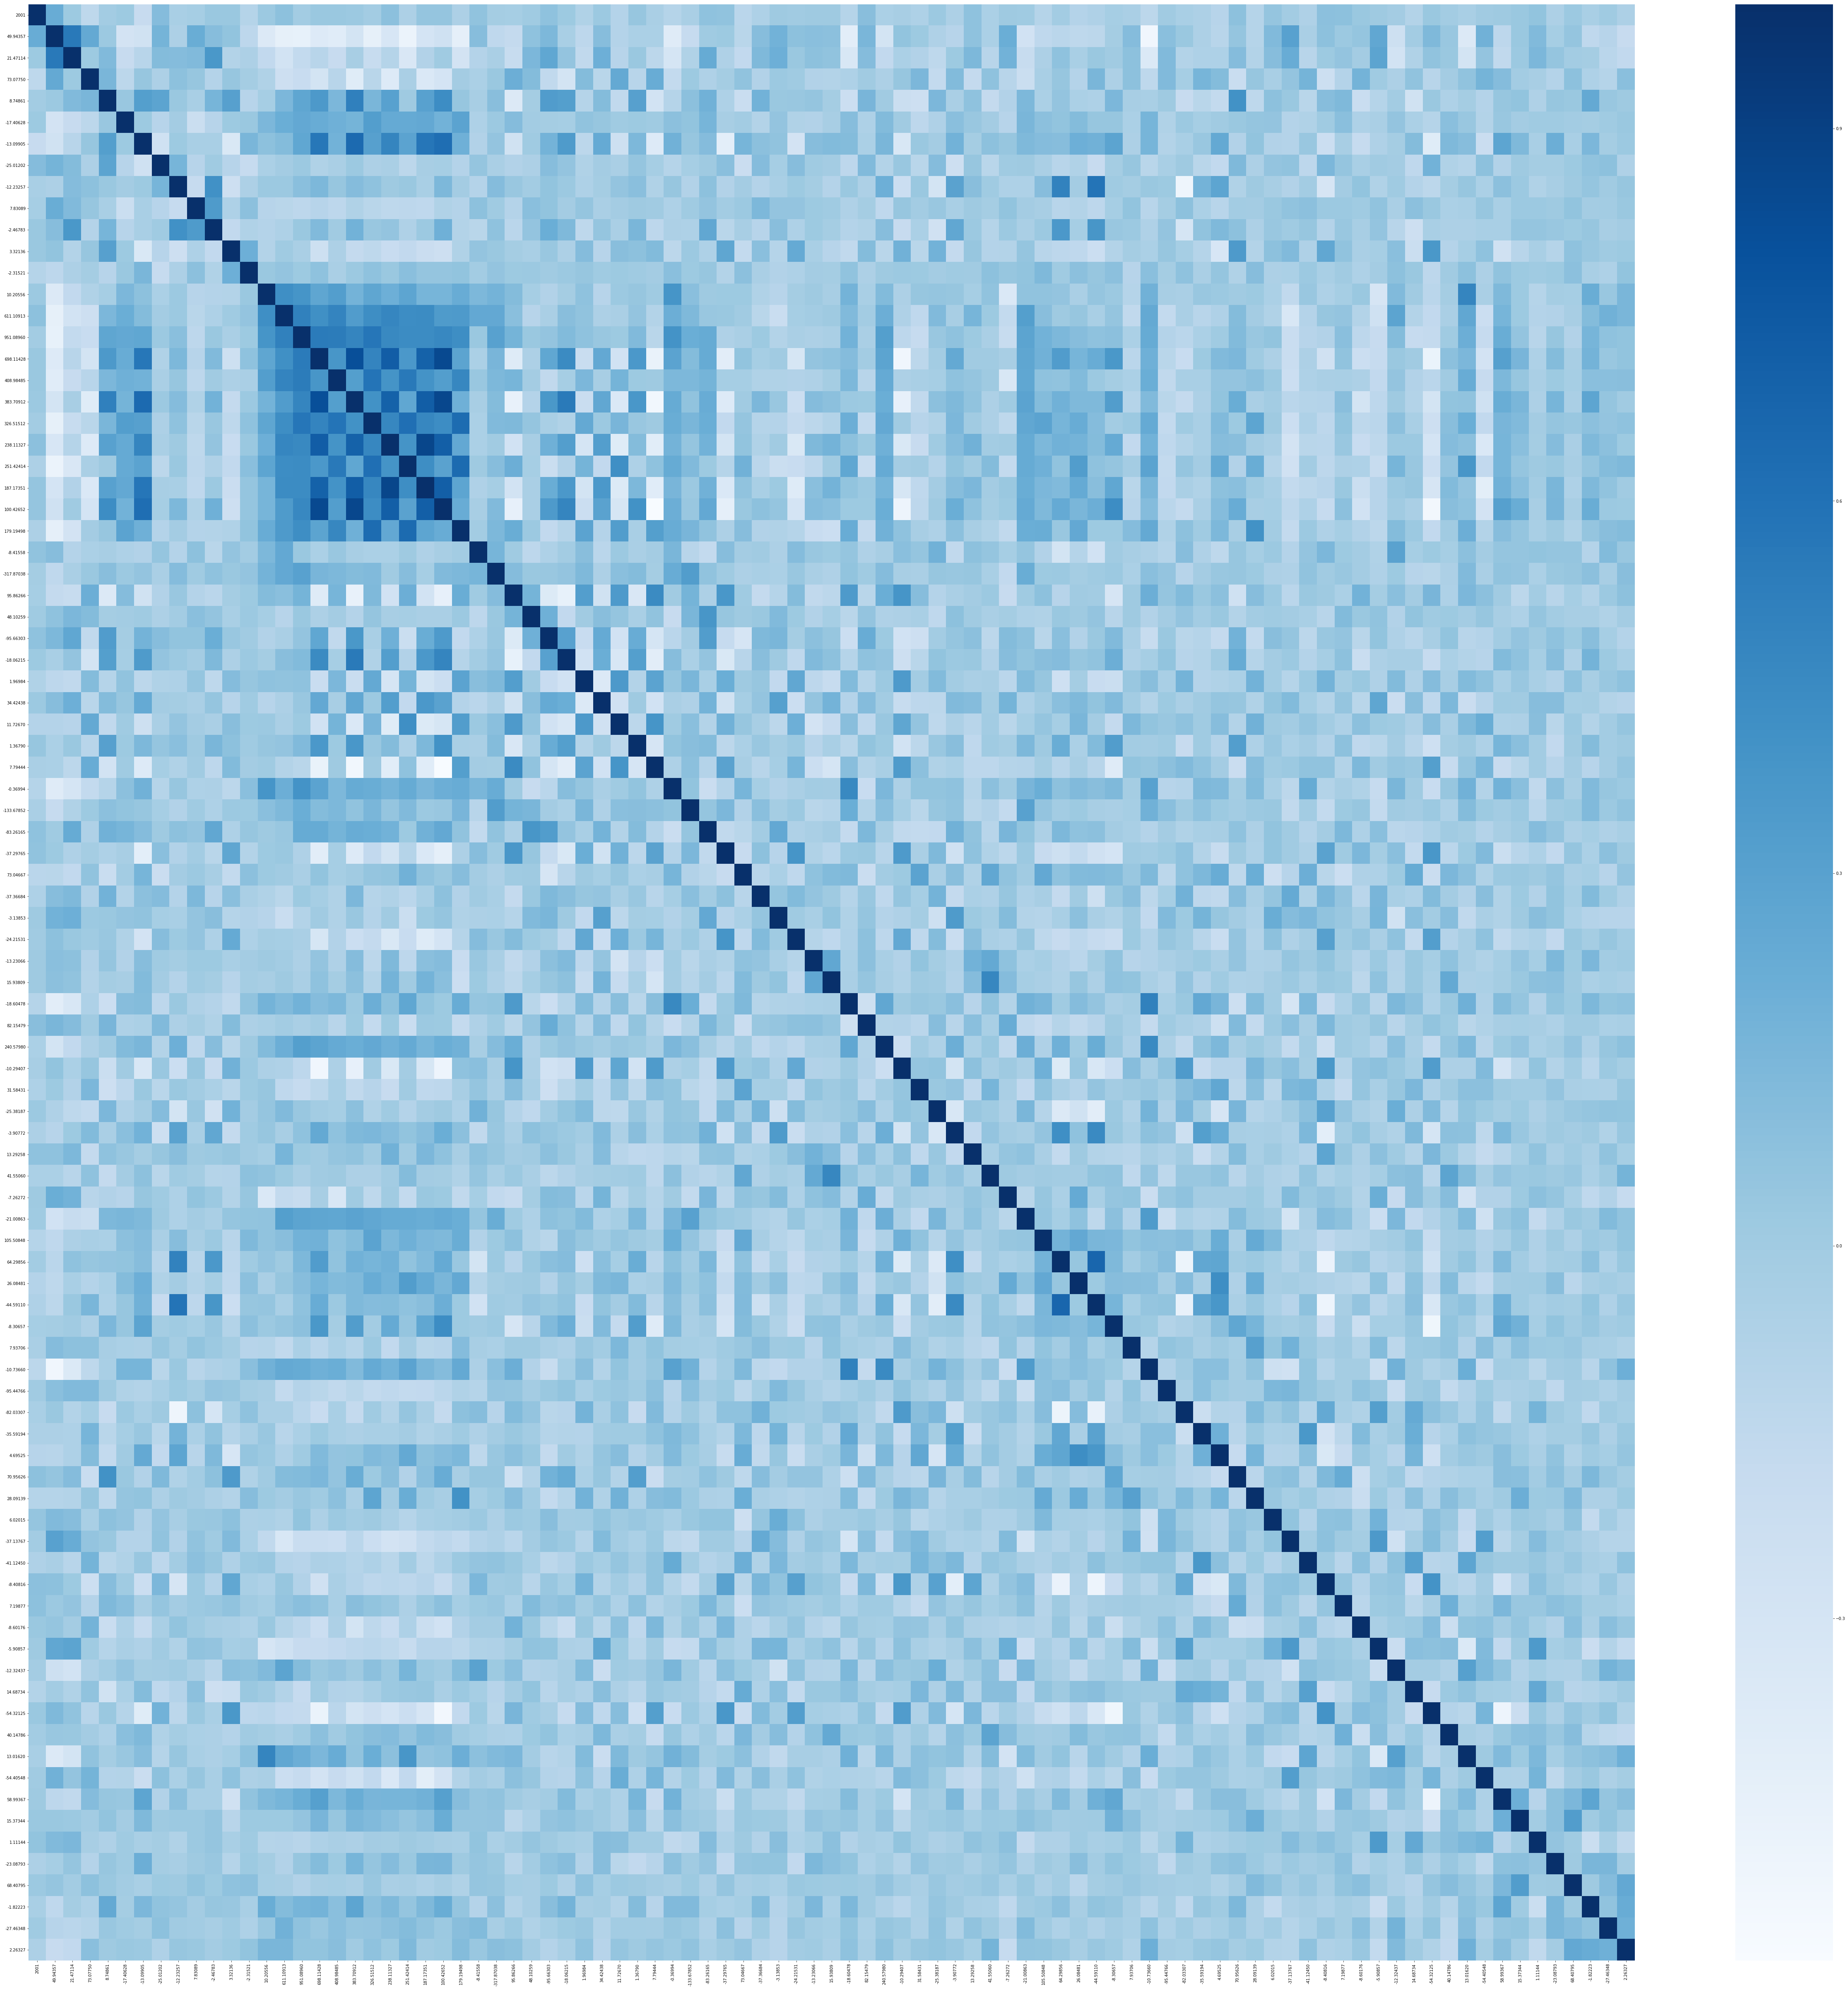

In [38]:
#Checking for correlation between different features
fig = plt.subplots(figsize=(91,91))
sns.heatmap(correlation, cmap='Blues')

Also, it should be interesting to see how different features regress with respect to each other!

In [48]:
ranges = (df['2001'].min(),df['2001'].max())

In [49]:
ranges

(1922, 2011)

In [104]:
from sklearn.preprocessing import minmax_scale
df['2001'] = minmax_scale(df['2001'], feature_range=(0,1))

In [105]:
#Now split the dataset with first 463,715 samples according to instructions suggested

In [106]:
Train = df.head(463715)

In [107]:
Train.shape

(463715, 91)

In [108]:
Test = df.tail(51630)

In [109]:
Test.shape

(51630, 91)

In [117]:
y_train = Train['2001'].values
X_train = Train.drop(columns=['2001'])
y_test = Test['2001'].values
X_test = Test.drop(columns=['2001'])

In [111]:
model = LinearRegression(n_jobs=4)

In [112]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=4, normalize=False)

In [129]:
model.score(X_test, y_test)*100

23.199637859061784

In [118]:
Predictions = model.predict(X_test)

In [130]:
from sklearn.metrics import r2_score

In [131]:
r2_score(y_test, Predictions)

0.23199637859061784

In [132]:
import numpy as np

In [134]:
print('Mean Square Error = {}'.format(np.mean((model.predict(X_test) - y_test) ** 2)))

Mean Square Error = 0.011418146393236853


In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model,X_train,y_train,cv=4,n_jobs=4)

In [ ]:
print(score)